This notebook contaisn the code for the ODE Lotka-Volterra model.

Graphs for different parameter configurations can be obtained by changing alpha, beta, gamma and delta as well as the initial prey population size x0 and the initial predator popuation size y0 in the Equations.

For matching the ODE model with the CA model the parameters in Interaction Paramters can be adjusted.

# ODE Model

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

## Interaction Parameter

In [57]:
grid_size = 25
neighbours = 8

def interaction_prob(x, y):
    density_prey = x / (grid_size**2)
    density_predator = y / (grid_size**2)
    prey_interact_w_predator = 1 - (1-density_predator)**neighbours
    predator_interact_w_prey = 1 - (1-density_prey)**neighbours
    interaction_prey = prey_interact_w_predator / y
    interaction_predator = predator_interact_w_prey / x
    return interaction_prey, interaction_predator

## Equations

In [58]:
alpha = 0.7 #0.3
beta = 0.9 #0.5#0.9#0.5 #0.03
gamma = 0.3 #0.1
delta = 0.9 #0.5#0.5#0.6 #0.05

x0 = 100#100.0
y0 = 66#66.0 #20.0
interaction_prey, interaction_predator = interaction_prob(x0, y0)
#beta = 1 - (1-beta)**(8*x0/(grid_size**2))
#delta = 1 - (1-delta)**(8*y0/(grid_size**2))

def lotka_volterra(X, t, alpha, beta, delta, gamma):
    x, y = X
    #interaction_prey, interaction_predator = interaction_prob(x, y)
    dotx = x * alpha - beta * x * y * interaction_prey
    #dotx = x * alpha - beta * x * y
    doty = delta * x * y * interaction_predator - gamma * y
    #doty = delta * x * y - gamma * y
    return np.array([dotx, doty])

In [59]:
Nt = 1000
tmax = 200.0
t = np.linspace(0.0,tmax, Nt)
X0 = [x0, y0]
res = integrate.odeint(lotka_volterra, X0, t, args = (alpha, beta, delta, gamma))#, full_output = 1)
x, y = res.T

## Visualization

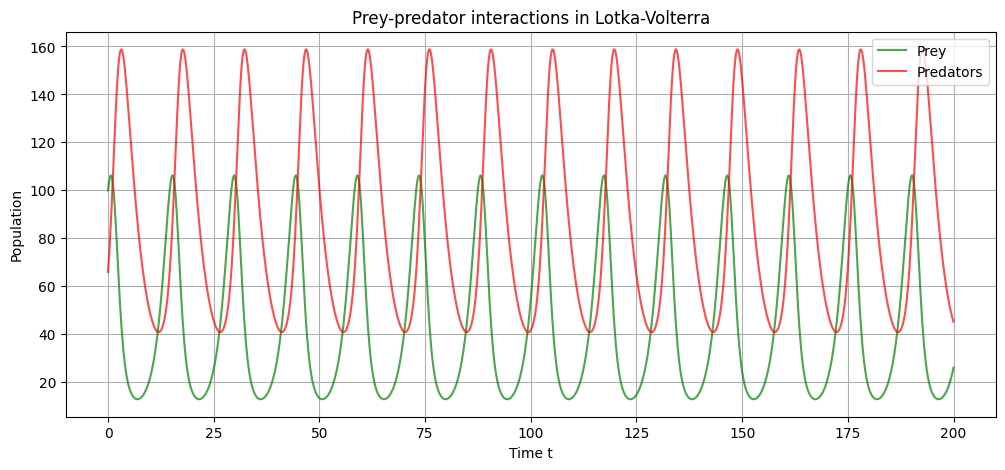

In [60]:
plt.figure(figsize=(12,5))
plt.grid()
plt.title("Prey-predator interactions in Lotka-Volterra")
plt.plot(t, x, 'g', label = 'Prey', alpha = 0.7)
plt.plot(t, y, 'r', label = "Predators", alpha=0.7)
plt.xlabel('Time t')
plt.ylabel('Population')
plt.legend()
plt.show()

# Sandbox (not used Code)

In [ ]:
x = 100
y = 66
for a in range(1,11):
  for b in range(1,11):
    for c in range(1,11):
      for d in range(1,11):
        V = d/10*x - c/10*np.log(x) + b/10*y - a/10*np.log(y)
        print(a, b, c, d, "V:", V)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
6 1 1 1 V: 13.625690136185336
6 1 1 2 V: 23.625690136185334
6 1 1 3 V: 33.625690136185334
6 1 1 4 V: 43.62569013618534
6 1 1 5 V: 53.62569013618534
6 1 1 6 V: 63.625690136185334
6 1 1 7 V: 73.62569013618533
6 1 1 8 V: 83.62569013618533
6 1 1 9 V: 93.62569013618533
6 1 1 10 V: 103.62569013618533
6 1 2 1 V: 13.165173117586528
6 1 2 2 V: 23.165173117586527
6 1 2 3 V: 33.16517311758653
6 1 2 4 V: 43.16517311758653
6 1 2 5 V: 53.16517311758653
6 1 2 6 V: 63.16517311758653
6 1 2 7 V: 73.16517311758652
6 1 2 8 V: 83.16517311758652
6 1 2 9 V: 93.16517311758652
6 1 2 10 V: 103.16517311758652
6 1 3 1 V: 12.704656098987718
6 1 3 2 V: 22.70465609898772
6 1 3 3 V: 32.70465609898772
6 1 3 4 V: 42.70465609898772
6 1 3 5 V: 52.70465609898772
6 1 3 6 V: 62.70465609898772
6 1 3 7 V: 72.70465609898771
6 1 3 8 V: 82.70465609898771
6 1 3 9 V: 92.70465609898771
6 1 3 10 V: 102.70465609898771
6 1 4 1 V: 12.24413908038891
6 1 4 2 V: 22.2441390

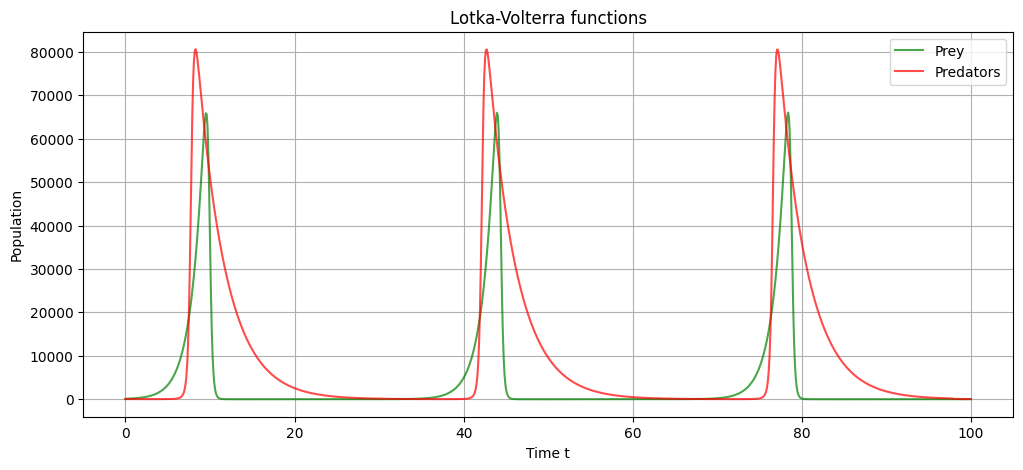

0.7785426658994229
-22


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
cutoff = len(x)
# Define function to perform cross-correlation analysis
def cross_correlation_analysis(ts1, ts2):
    # Calculate cross-correlation
    cross_corr = np.correlate(ts1, ts2, mode='full')

    # Find lag with maximum correlation
    max_corr_index = np.argmax(cross_corr)
    lag = max_corr_index - len(ts1) + 1  # Lag is relative to ts1

    # Calculate correlation coefficient
    correlation_coefficient = np.corrcoef(ts1, np.roll(ts2, lag))[0, 1]

    return lag, correlation_coefficient, cross_corr

# Perform cross-correlation analysis for each pair of time series
lag, correlation_coefficient, _ = cross_correlation_analysis(x[:cutoff], y[:cutoff])


plt.figure(figsize=(12,5))
plt.grid()
plt.title("Lotka-Volterra functions")
plt.plot(t[:cutoff], x[:cutoff], 'g', label = 'Prey', alpha = 0.7)
plt.plot(t[:cutoff], np.roll(y, lag)[:cutoff], 'r', label = "Predators", alpha=0.7)
plt.xlabel('Time t')
plt.ylabel('Population')
plt.legend()
plt.show()

print(correlation_coefficient)
print(lag)